In [27]:
# import all the libraries
import numpy as np
import pandas as pd
import seaborn as sb        
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import sklearn  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier



Load the dataset in the file named winequality_white.csv and produce at least one table and one graph that summarize the dataset statistics. Separate the data into training and testing datasets and set up a classification problem: predicting the quality value (a single variable with seven classes labeled 3, 4, 5, …, 9) based on the values of all the other variables in the file (acidity, alcohol, pH, etc.)

In [28]:
dataset = pd.read_csv('winequality-white.csv')    #loading the given data
dataset = dataset.dropna()

In [29]:
display(dataset)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [30]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [31]:
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [32]:
display(dataset.describe(include='all'))  #describing the statistics

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [33]:
X = dataset.drop(columns=["quality"])   
y = dataset['quality']   #selecting the Flowpattern colum values
print('done \n')

done 



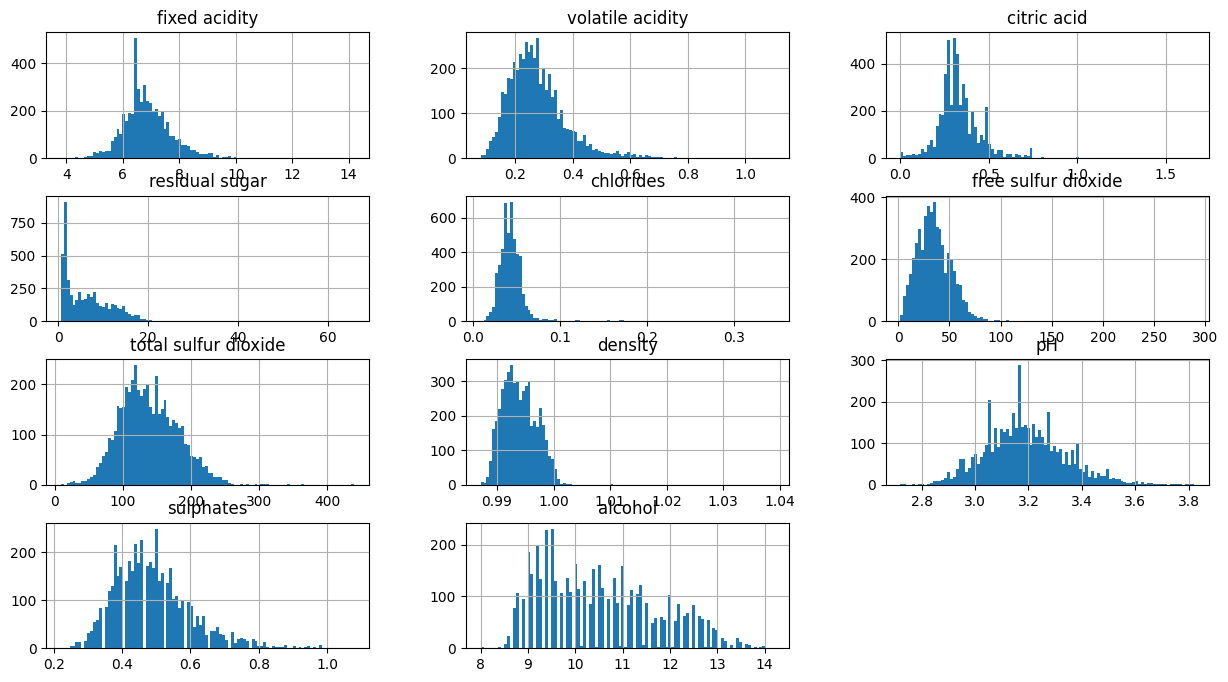

In [34]:
X.hist(figsize=(15, 8), bins=100)  # bins ~= sqrt(N)
plt.show()

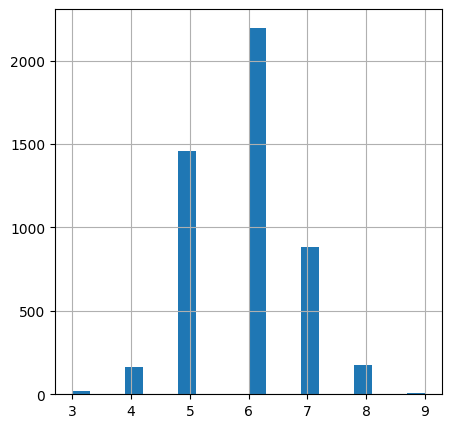

In [35]:
y.hist(figsize=(5,5),bins =20)
plt.show()

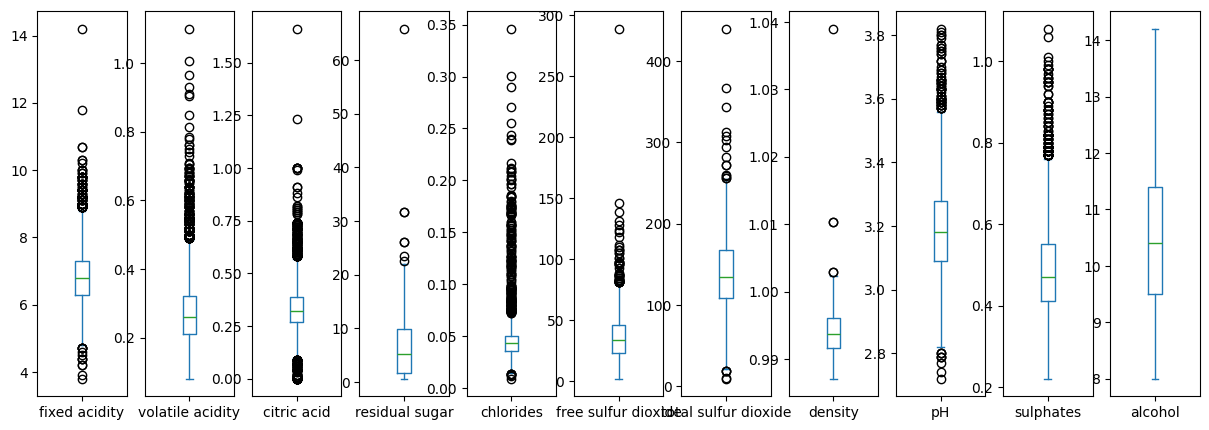

In [36]:
X.plot(figsize=(15, 5), kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

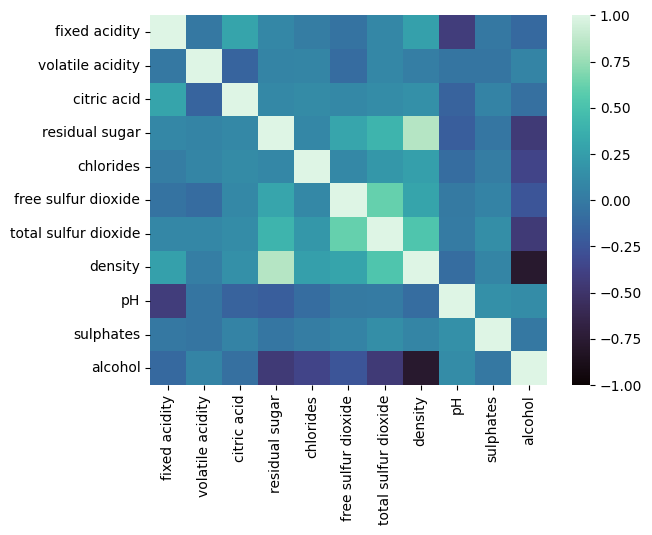

In [37]:
corr = X.corr()
sb.heatmap( corr, cmap='mako', vmax=1.0, vmin=-1.0 );
plt.show()

Split the data into training and testing data

In [38]:
test_pct = 0.2   # reserve 20% of the data points for testing performance
seed = 7          # specifying the seed allows for repeatability
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)
display(X_train.describe(include='all'))
#X_train.hist(figsize=(10, 10), bins=12)  # bins ~= sqrt(N)
#plt.show()
display(y_train.describe(include='all'))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.851838,0.277323,0.335066,6.362864,0.045736,35.118938,137.960439,0.994009,3.186965,0.491335,10.517758
std,0.823636,0.099162,0.120757,5.100173,0.021668,16.884647,42.153704,0.003013,0.150280,0.115144,1.235696
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987130,2.740000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991712,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.100000,0.043000,34.000000,134.000000,0.993700,3.180000,0.480000,10.400000
75%,7.300000,0.320000,0.390000,9.800000,0.050000,45.000000,166.000000,0.996075,3.280000,0.550000,11.400000
max,10.700000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.000000


count    3918.000000
mean        5.882848
std         0.883171
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

Train and tune the MLPClassifier (via cross-validation) using at least three different combinations of architecture choices (e.g., number of layers, # of neurons per layer, activation function). (6 points)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import warnings

In [40]:
mlp = MLPClassifier(hidden_layer_sizes=(8,), # one hidden layer with 50 neurons
                    activation = 'relu',  # ReLU is the default option
                    solver='adam',  # default is Adam
                    alpha=1e-4,  # regulariztion parameter, set to default=0.0001 (increase up to 1.0 for stronger regularization)
                    learning_rate_init=.1 ,  # initial step-size for updating the weights, default is 0.001
                    max_iter=10,  # number of epochs, default=200
                    random_state=42,
                    verbose=10, 
                    )
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

Iteration 1, loss = 9.51366662
Iteration 2, loss = 1.75965675
Iteration 3, loss = 1.35015206
Iteration 4, loss = 1.29426999
Iteration 5, loss = 1.29064183
Iteration 6, loss = 1.28919303
Iteration 7, loss = 1.28865894
Iteration 8, loss = 1.28894471
Iteration 9, loss = 1.28845963
Iteration 10, loss = 1.28924992
Training set score: 0.444615
Done


In [41]:
mlp = MLPClassifier(hidden_layer_sizes=(2,40,), # one hidden layer with 50 neurons
                    activation = 'tanh',  # ReLU is the default option
                    solver='sgd',  # default is Adam
                    alpha=1e-4,  # regulariztion parameter, set to default=0.0001 (increase up to 1.0 for stronger regularization)
                    learning_rate_init=.001 ,  # initial step-size for updating the weights, default is 0.001
                    max_iter=200,  # number of epochs, default=200
                    random_state=42,
                    verbose=10, 
                    )
# Train the classifier
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

Iteration 1, loss = 1.81701561
Iteration 2, loss = 1.64915812
Iteration 3, loss = 1.53003357
Iteration 4, loss = 1.45866968
Iteration 5, loss = 1.41522712
Iteration 6, loss = 1.38646259
Iteration 7, loss = 1.36679311
Iteration 8, loss = 1.35265266
Iteration 9, loss = 1.34226146
Iteration 10, loss = 1.33421857
Iteration 11, loss = 1.32806568
Iteration 12, loss = 1.32327626
Iteration 13, loss = 1.31931072
Iteration 14, loss = 1.31608865
Iteration 15, loss = 1.31351897
Iteration 16, loss = 1.31122603
Iteration 17, loss = 1.30934542
Iteration 18, loss = 1.30785887
Iteration 19, loss = 1.30630769
Iteration 20, loss = 1.30512470
Iteration 21, loss = 1.30408500
Iteration 22, loss = 1.30295755
Iteration 23, loss = 1.30207237
Iteration 24, loss = 1.30127613
Iteration 25, loss = 1.30067641
Iteration 26, loss = 1.29992994
Iteration 27, loss = 1.29926614
Iteration 28, loss = 1.29874503
Iteration 29, loss = 1.29828145
Iteration 30, loss = 1.29778461
Iteration 31, loss = 1.29723223
Iteration 32, los

In [42]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), # one hidden layer with 50 neurons
                    activation = 'logistic',  # ReLU is the default option
                    solver='sgd',  # default is Adam
                    alpha=1e-4,  # regulariztion parameter, set to default=0.0001 (increase up to 1.0 for stronger regularization)
                    learning_rate_init=.001 ,  # initial step-size for updating the weights, default is 0.001
                    max_iter=200,  # number of epochs, default=200
                    random_state=42,
                    verbose=10, 
                    )
# Train the classifier
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

Iteration 1, loss = 1.69022289
Iteration 2, loss = 1.37797989
Iteration 3, loss = 1.32391565
Iteration 4, loss = 1.30582779
Iteration 5, loss = 1.29733385
Iteration 6, loss = 1.29239751
Iteration 7, loss = 1.28874236
Iteration 8, loss = 1.28544126
Iteration 9, loss = 1.28304281
Iteration 10, loss = 1.28090198
Iteration 11, loss = 1.27916107
Iteration 12, loss = 1.27726206
Iteration 13, loss = 1.27544484
Iteration 14, loss = 1.27381152
Iteration 15, loss = 1.27226516
Iteration 16, loss = 1.27132772
Iteration 17, loss = 1.27020126
Iteration 18, loss = 1.26892232
Iteration 19, loss = 1.26768762
Iteration 20, loss = 1.26674586
Iteration 21, loss = 1.26579406
Iteration 22, loss = 1.26465853
Iteration 23, loss = 1.26380308
Iteration 24, loss = 1.26313127
Iteration 25, loss = 1.26178710
Iteration 26, loss = 1.26043924
Iteration 27, loss = 1.25967788
Iteration 28, loss = 1.25786512
Iteration 29, loss = 1.25673509
Iteration 30, loss = 1.25528946
Iteration 31, loss = 1.25354595
Iteration 32, los

The model combination with hidden_layer_sizes=(2,40,), activation = 'logistic', and solver='lbfgs',  # default is Adam had the best training set score of 0.495661. Initially the default combination only had a score of 0.444615. So, the changes increased the score.

Q2.Study and describe the performance impact of varying at least three different combinations of optimizer parameter values (e.g., solver, epoch, learning rate) for one of the architectures in Step 1. (6 points)

For the third combination with best score, i ma going to change the solver, epoch and leafning rate below. 

In [43]:
#change solver to lbfgs
mlp = MLPClassifier(hidden_layer_sizes=(50,), activation = 'logistic', solver='lbfgs', alpha=1e-4, learning_rate_init=.01 , max_iter=200, 
                    random_state=42,  verbose=10,)
# Train the classifier
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          957     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99122D+00    |proj g|=  1.61472D+00

At iterate    1    f=  1.48651D+00    |proj g|=  4.95842D-01

At iterate    2    f=  1.44932D+00    |proj g|=  5.06207D-01

At iterate    3    f=  1.31719D+00    |proj g|=  7.04368D-02

At iterate    4    f=  1.30716D+00    |proj g|=  1.11611D-01

At iterate    5    f=  1.30295D+00    |proj g|=  1.16446D-01

At iterate    6    f=  1.30047D+00    |proj g|=  1.34931D-01

At iterate    7    f=  1.29609D+00    |proj g|=  2.90630D-01

At iterate    8    f=  1.29255D+00    |proj g|=  9.98807D-02

At iterate    9    f=  1.28941D+00    |proj g|=  5.98304D-02

At iterate   10    f=  1.27982D+00    |proj g|=  8.91203D-02

At iterate   11    f=  1.27802D+00    |proj g|=  1.10941D-01

At iterate   12    f=  1.27661D+00    |proj g|=  7.28554D-02

At iterate   13    f=  1.2

 This problem is unconstrained.



At iterate   25    f=  1.24020D+00    |proj g|=  1.11852D-01

At iterate   26    f=  1.23849D+00    |proj g|=  3.30670D-01

At iterate   27    f=  1.23676D+00    |proj g|=  2.26058D-01

At iterate   28    f=  1.23505D+00    |proj g|=  1.38176D-01

At iterate   29    f=  1.23400D+00    |proj g|=  1.87175D-01

At iterate   30    f=  1.23341D+00    |proj g|=  1.10395D-01

At iterate   31    f=  1.23259D+00    |proj g|=  1.41621D-01

At iterate   32    f=  1.23125D+00    |proj g|=  1.09220D-01

At iterate   33    f=  1.22898D+00    |proj g|=  9.11489D-02

At iterate   34    f=  1.22694D+00    |proj g|=  9.95193D-02

At iterate   35    f=  1.22315D+00    |proj g|=  1.44265D-01

At iterate   36    f=  1.21988D+00    |proj g|=  2.59778D-01

At iterate   37    f=  1.21621D+00    |proj g|=  7.50640D-02

At iterate   38    f=  1.21442D+00    |proj g|=  6.50156D-02

At iterate   39    f=  1.21117D+00    |proj g|=  2.01116D-01

At iterate   40    f=  1.20781D+00    |proj g|=  1.57267D-01

At iter

In [44]:
#learning rate reduced to 0.001
mlp = MLPClassifier(hidden_layer_sizes=(50,), activation = 'logistic', solver='adam', alpha=1e-4, learning_rate_init=.001 , max_iter=200, 
                    random_state=42,  verbose=10,)
# Train the classifier
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

Iteration 1, loss = 1.71853171
Iteration 2, loss = 1.35950561
Iteration 3, loss = 1.29182158
Iteration 4, loss = 1.27804731
Iteration 5, loss = 1.26783029
Iteration 6, loss = 1.26076339
Iteration 7, loss = 1.25267076
Iteration 8, loss = 1.24474836
Iteration 9, loss = 1.23741902
Iteration 10, loss = 1.23034595
Iteration 11, loss = 1.22383771
Iteration 12, loss = 1.21801382
Iteration 13, loss = 1.21068904
Iteration 14, loss = 1.20526712
Iteration 15, loss = 1.19931041
Iteration 16, loss = 1.19463214
Iteration 17, loss = 1.19038842
Iteration 18, loss = 1.18726245
Iteration 19, loss = 1.18363422
Iteration 20, loss = 1.18227400
Iteration 21, loss = 1.17950221
Iteration 22, loss = 1.17761613
Iteration 23, loss = 1.17518929
Iteration 24, loss = 1.17355081
Iteration 25, loss = 1.17044947
Iteration 26, loss = 1.16769907
Iteration 27, loss = 1.16695698
Iteration 28, loss = 1.16358382
Iteration 29, loss = 1.16307472
Iteration 30, loss = 1.15966432
Iteration 31, loss = 1.15740849
Iteration 32, los

In [45]:

mlp = MLPClassifier(hidden_layer_sizes=(50,), activation = 'logistic', solver='adam', alpha=1e-4, learning_rate_init=.001 , max_iter=100, 
                    random_state=42,  verbose=10,)
# Train the classifier
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

Iteration 1, loss = 1.71853171
Iteration 2, loss = 1.35950561
Iteration 3, loss = 1.29182158
Iteration 4, loss = 1.27804731
Iteration 5, loss = 1.26783029
Iteration 6, loss = 1.26076339
Iteration 7, loss = 1.25267076
Iteration 8, loss = 1.24474836
Iteration 9, loss = 1.23741902
Iteration 10, loss = 1.23034595
Iteration 11, loss = 1.22383771
Iteration 12, loss = 1.21801382
Iteration 13, loss = 1.21068904
Iteration 14, loss = 1.20526712
Iteration 15, loss = 1.19931041
Iteration 16, loss = 1.19463214
Iteration 17, loss = 1.19038842
Iteration 18, loss = 1.18726245
Iteration 19, loss = 1.18363422
Iteration 20, loss = 1.18227400
Iteration 21, loss = 1.17950221
Iteration 22, loss = 1.17761613
Iteration 23, loss = 1.17518929
Iteration 24, loss = 1.17355081
Iteration 25, loss = 1.17044947
Iteration 26, loss = 1.16769907
Iteration 27, loss = 1.16695698
Iteration 28, loss = 1.16358382
Iteration 29, loss = 1.16307472
Iteration 30, loss = 1.15966432
Iteration 31, loss = 1.15740849
Iteration 32, los

changing the solver to lbfgs increased the score from 0.48 to 0.50. Now, in this same model combo, reducing the learning rate again raised the score to 0.54. Reduccing the maximum iterations from 200 to 100 obviously reduced the score. 

Q3. Test the performance of the best MLPClassifier from Steps 1 and 2, using two scoring methods of your choice. Discuss in detail your results. (6 points)

we can use two common scoring methods: accuracy and F1 score. The accuracy measures the percentage of correctly predicted samples, while the F1 score is a weighted average of the precision and recall.

In [46]:
y_predicted = mlp.predict(X_test)   # use the trained classifier to predict on the test set

print('\n clasification report:\n', classification_report(y_test, y_predicted))  # compare predictions with ground truth
print('Done')


 clasification report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        39
           5       0.50      0.50      0.50       280
           6       0.53      0.72      0.61       456
           7       0.45      0.19      0.27       162
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.51       980
   macro avg       0.21      0.20      0.20       980
weighted avg       0.46      0.51      0.47       980

Done


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
accuracy = accuracy_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted, average='weighted')

# Print the results
print('Accuracy:', accuracy)
print('F1 score:', f1)

Accuracy: 0.5112244897959184
F1 score: 0.47002109716705504


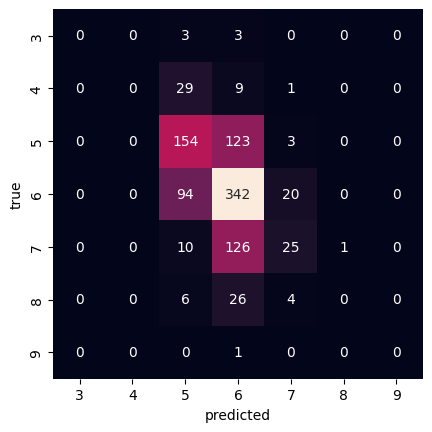


 clasification report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        39
           5       0.52      0.55      0.53       280
           6       0.54      0.75      0.63       456
           7       0.47      0.15      0.23       162
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.53       980
   macro avg       0.22      0.21      0.20       980
weighted avg       0.48      0.53      0.48       980

Cohen Kappa Score: 0.22660577905085477


done 



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
selected_model = make_pipeline(MLPClassifier(hidden_layer_sizes=(50,)) )
selected_model.fit(X_train, y_train)
predictions = selected_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
sb.heatmap(df_cm, square=True, annot=True, fmt='d', cbar=False )
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
#
print('\n clasification report:\n', classification_report(y_test, predictions))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, predictions))
print('\n')        
print('done \n')

Train and tune a different classifier that is not a neural network; compare the MLPClassifier test results from Step 3 to that classifier. Discuss in detail your results. (4 points)

In [49]:
seed = 42 
test_size = 0.20   # means 20 percent
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [50]:
selected_model = DecisionTreeClassifier()
hyperparameters = {'max_depth':[5, 6, 7], 'criterion':['gini', 'entropy'] }

print("Now tuning hyperparameters...")
clf = GridSearchCV(selected_model, hyperparameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print("Best hyperparameters found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")
tuned_model = clf.best_estimator_
print(f'Tuned decision tree has {tuned_model.tree_.node_count} nodes with maximum depth {tuned_model.tree_.max_depth}.')
print('\n')
y_true, y_pred = y_test, tuned_model.predict(X_test)
print('f1_score is')
print(f1_score(y_test,y_pred,average='macro'))

Now tuning hyperparameters...
Best hyperparameters found on development set:
{'criterion': 'entropy', 'max_depth': 7}
Grid scores on development set:
Tuned decision tree has 219 nodes with maximum depth 7.


f1_score is
0.2935355858069188


f1_score of MLPClassifier test result is 0.43 and that of decision tree classifier is 0.29. Clearly the MLPClassifier is better at making predictions on this dataset. 

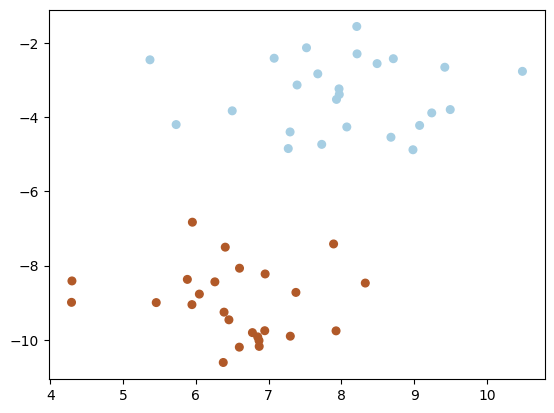

In [51]:
X,y=make_blobs(n_samples=50, centers=2, random_state=6)
#plotting the data
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.Paired)
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
plt.show()